# Random Forest Example

When I used X_test here, I am using it as a validation set

Some code cells will not run if they require graphviz for generating the graphs, just comment them out

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
#from graphviz import Source

In [2]:
from sklearn.datasets import make_blobs

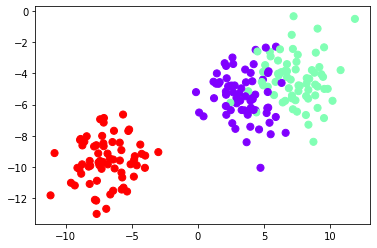

In [41]:
X, y = make_blobs(n_samples=200, centers=3,
                  random_state=400, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [42]:
from sklearn.model_selection import train_test_split

In [80]:
DecisionTreeClassifier?

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=444)

In [44]:
def plotestimators(clf, X, y, plot_X, plot_y, text="Decision Boundaries"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max,0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='rainbow')
    # Plot also the training points
    sns.scatterplot(x=plot_X[:, 0], y=plot_X[:, 1], hue=plot_y,
                palette='rainbow', alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(text)
    plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, criterion='gini')
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [46]:
#DecisionTreeClassifier?

In [47]:
model.score(X_test, y_test)

0.9

In [48]:
model.score(X_train, y_train)

0.9466666666666667

In [49]:
dotfile = tree.export_graphviz(model)

In [50]:
with open('graph.dot','w') as f:
    f.write(dotfile)

In [51]:
import math

In [52]:
(105/343)*math.log((105/343) , 2) + (125/343)*math.log((125/343) , 2)+ (113/343)*math.log((113/343) , 2)

-1.581251245208906

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
score = [0]
for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score.append(model.score(X_train, y_train))
print(score)
bestk = np.argmax(score)
model = KNeighborsClassifier(n_neighbors=bestk)
model.fit(X_train, y_train)
model.score(X_test, y_test)

[0, 1.0, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.94, 0.92, 0.9266666666666666, 0.92, 0.9266666666666666, 0.9266666666666666, 0.9266666666666666, 0.9333333333333333, 0.9333333333333333, 0.9266666666666666, 0.92, 0.92, 0.9266666666666666, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.94, 0.92, 0.9266666666666666, 0.92, 0.9266666666666666, 0.92, 0.92, 0.92, 0.92, 0.9266666666666666, 0.92, 0.9266666666666666, 0.9266666666666666, 0.9266666666666666, 0.9266666666666666, 0.9266666666666666, 0.92, 0.9266666666666666, 0.92, 0.9133333333333333, 0.9133333333333333, 0.9133333333333333, 0.9133333333333333, 0.92, 0.9133333333333333, 0.9133333333333333, 0.9133333333333333, 0.92, 0.92, 0.92, 0.92, 0.9266666666666666, 0.9333333333333333, 0.9266666666666666, 0.9333333333333333, 0.9266666666666666, 0.9266666666666666, 0.9266666666666666, 0.9266666666666666, 0.9266666666666666, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.94, 0.94, 0.94, 0.93333333333

0.84

In [55]:
bestk

1

In [56]:
math.log((105/343) , 2)

-1.7078192485066899

In [57]:
model.predict([[-1,-3]])

array([0])

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,
max_depth=3, min_samples_leaf=10)
model.fit(X_train , y_train)
print(model.score(X_train , y_train))
print(model.score(X_test , y_test))

0.9466666666666667
0.92


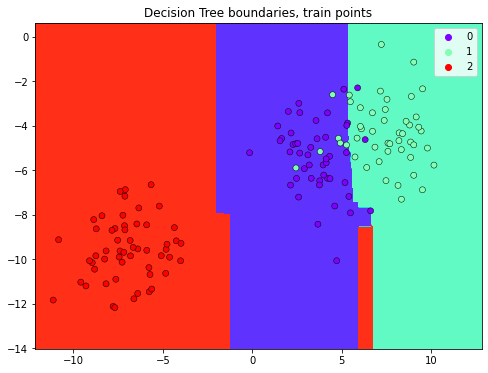

In [59]:
plotestimators(model, X,y, X_train, y_train, "Decision Tree boundaries, train points")

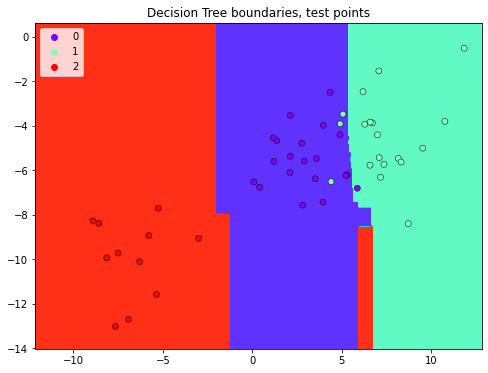

In [60]:
plotestimators(model, X, y, X_test, y_test, "Decision Tree boundaries, test points")

In [61]:
DecisionTreeClassifier?

In [62]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4)

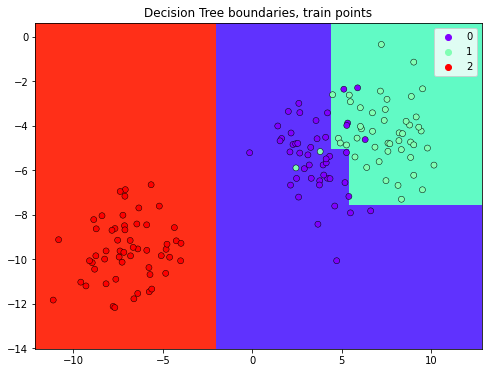

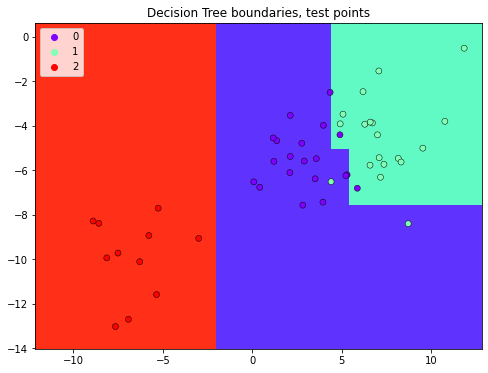

In [63]:
plotestimators(model, X, y, X_train, y_train, "Decision Tree boundaries, train points")
plotestimators(model, X, y, X_test, y_test, "Decision Tree boundaries, test points")

In [64]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

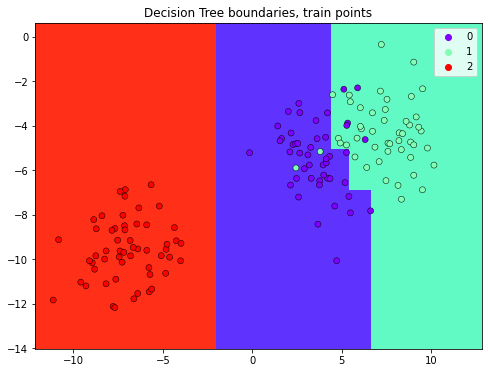

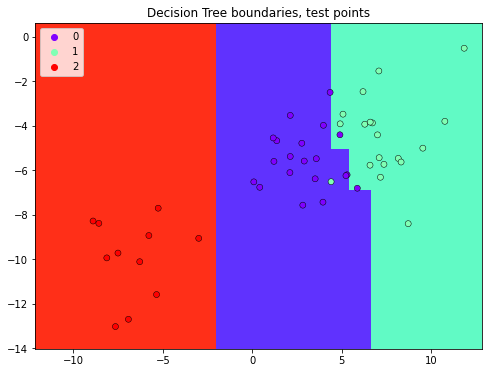

In [65]:
plotestimators(model, X, y, X_train, y_train, "Decision Tree boundaries, train points")
plotestimators(model, X, y, X_test, y_test, "Decision Tree boundaries, test points")

In [66]:
dotfile = tree.export_graphviz(model)

In [67]:
dotfile

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= -2.069\\nentropy = 1.581\\nsamples = 150\\nvalue = [47, 48, 55]"] ;\n1 [label="entropy = 0.0\\nsamples = 55\\nvalue = [0, 0, 55]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 5.411\\nentropy = 1.0\\nsamples = 95\\nvalue = [47, 48, 0]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[0] <= 4.417\\nentropy = 0.536\\nsamples = 49\\nvalue = [43, 6, 0]"] ;\n2 -> 3 ;\n4 [label="X[1] <= -5.058\\nentropy = 0.303\\nsamples = 37\\nvalue = [35, 2, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.439\\nsamples = 22\\nvalue = [20, 2, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 15\\nvalue = [15, 0, 0]"] ;\n4 -> 6 ;\n7 [label="X[1] <= -5.027\\nentropy = 0.918\\nsamples = 12\\nvalue = [8, 4, 0]"] ;\n3 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 5\\nvalue = [5, 0, 0]"] ;\n7 -> 8 ;\n9 [label="entropy = 0.985\\nsamples = 7\\nvalue = [3, 4, 0]"] ;\n7 -> 9 ;\n10 [label="X[0] <= 6.

In [68]:
#with open('graph.dot','w') as f:
#    f.write(dotfile)

In [69]:
for i in range(1,19):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train , y_train)
    print("Tree Depth ", i, "Training score: ", model.score(X_train, y_train), ", Validation score:", model.score(X_test, y_test))

Tree Depth  1 Training score:  0.6866666666666666 , Validation score: 0.6
Tree Depth  2 Training score:  0.9333333333333333 , Validation score: 0.92
Tree Depth  3 Training score:  0.9466666666666667 , Validation score: 0.9
Tree Depth  4 Training score:  0.9533333333333334 , Validation score: 0.92
Tree Depth  5 Training score:  0.98 , Validation score: 0.88
Tree Depth  6 Training score:  0.9933333333333333 , Validation score: 0.88
Tree Depth  7 Training score:  1.0 , Validation score: 0.88
Tree Depth  8 Training score:  1.0 , Validation score: 0.88
Tree Depth  9 Training score:  1.0 , Validation score: 0.88
Tree Depth  10 Training score:  1.0 , Validation score: 0.86
Tree Depth  11 Training score:  1.0 , Validation score: 0.88
Tree Depth  12 Training score:  1.0 , Validation score: 0.86
Tree Depth  13 Training score:  1.0 , Validation score: 0.86
Tree Depth  14 Training score:  1.0 , Validation score: 0.88
Tree Depth  15 Training score:  1.0 , Validation score: 0.86
Tree Depth  16 Train

In [70]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [71]:
model = VotingClassifier([
('nb', GaussianNB()),
('knn', KNeighborsClassifier(5)),
('svm', SVC(kernel='linear', C=0.1)),
('tree1', DecisionTreeClassifier(max_depth=4)),
('tree2', DecisionTreeClassifier(min_samples_leaf=10)),
])
model.fit(X_train , y_train)
print(model.score(X_train , y_train))
print(model.score(X_test , y_test))

0.9333333333333333
0.96


In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,
max_depth=3, min_samples_leaf=10)
model.fit(X_train , y_train)
print(model.score(X_train , y_train))
print(model.score(X_test , y_test))

0.94
0.92


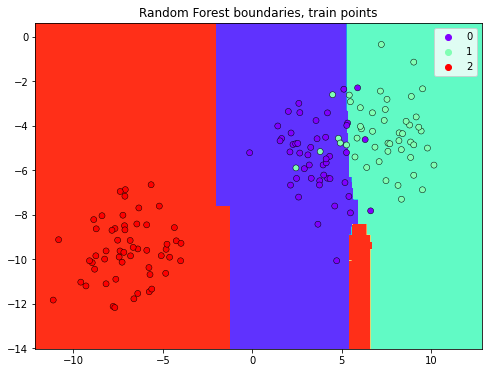

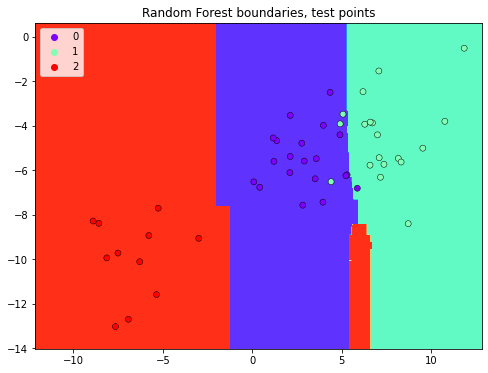

In [74]:
plotestimators(model, X, y, X_train, y_train, "Random Forest boundaries, train points")
plotestimators(model, X, y, X_test, y_test, "Random Forest boundaries, test points")

In [75]:
model.estimators_[99]

DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=10,
                       random_state=1456943889)

In [76]:
dotfile = tree.export_graphviz(model.estimators_[1])
with open('graph1.dot','w') as f:
    f.write(dotfile)

## When I use train/test, these are the ones from the overall set, not the bootstrapping

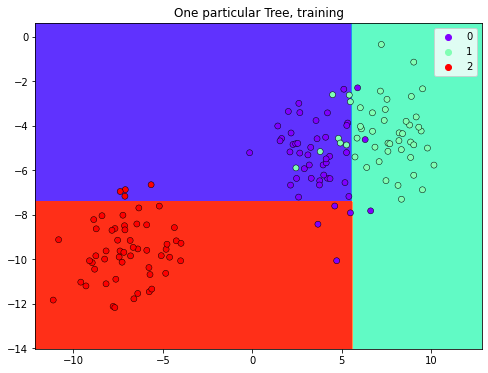

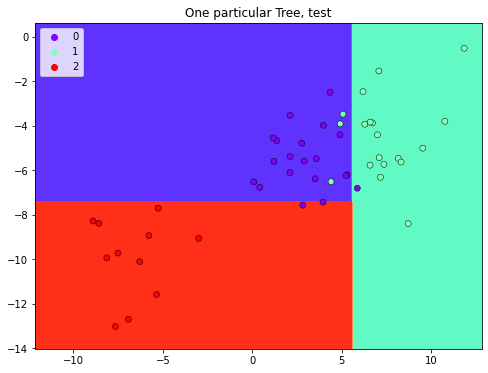

In [77]:
plotestimators(model.estimators_[0], X, y, X_train, y_train, "One particular Tree, training")
plotestimators(model.estimators_[0], X, y, X_test, y_test, "One particular Tree, test")

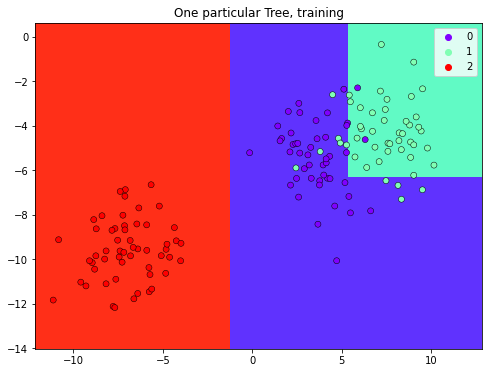

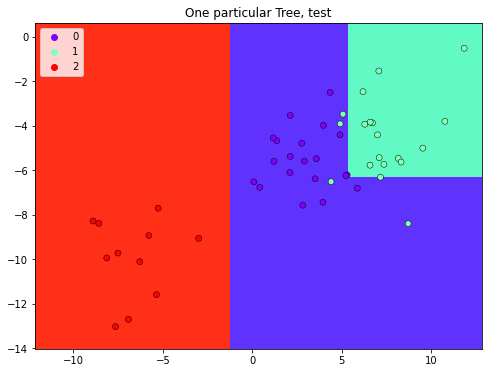

In [78]:
plotestimators(model.estimators_[1], X, y, X_train, y_train, "One particular Tree, training")
plotestimators(model.estimators_[1], X, y, X_test, y_test, "One particular Tree, test")

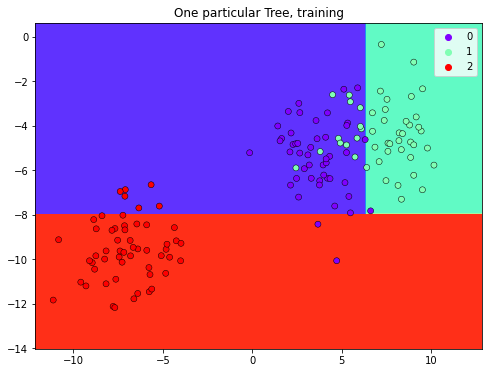

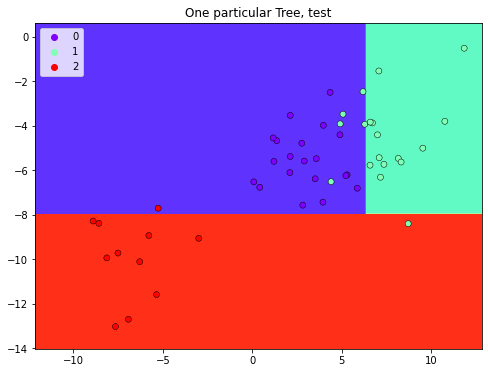

In [79]:
plotestimators(model.estimators_[2], X, y, X_train, y_train, "One particular Tree, training")
plotestimators(model.estimators_[2], X, y, X_test, y_test, "One particular Tree, test")